In [46]:
import pandas as pd
from itertools import combinations
import math
import numpy as np
import statistics
from itertools import permutations
from bioinfokit import analys, visuz

In [66]:
#pd.set_option('display.max_rows', 400)
data = pd.read_csv("cnvator_data_sudmant_overlapped.csv")


anotation = pd.read_csv('/branchinecta/jbazanwilliamson/SGDP_anotation.csv', sep=',', encoding='latin-1',  index_col=1)



#data['Chr']=pd.to_numeric(data.Chr)
data

,Sample_ID,Chr,Start_original,End_original,Start,End,SIZE,SCORE,RD,LENGHT,P-VALUE,GAUSSIAN
0,LP6005441-DNA_A01,1,231001,237900,228416,267160,3.0,duplication,2.089230,6900.0,0.000000e+00,5.215800e-35
1,LP6005441-DNA_A01,1,471201,551200,471226,471326,1.0,deletion,0.187758,80000.0,1.992160e-12,2.215930e+09
2,LP6005441-DNA_A01,1,723801,728100,712534,763301,3.0,duplication,1.594500,4300.0,1.120070e-02,1.742820e+09
3,LP6005441-DNA_A01,1,1010901,1014200,1009660,1015541,1.0,deletion,0.498249,3300.0,5.434590e-04,2.196950e+09
4,LP6005441-DNA_A01,1,4124201,4127700,4120597,4131559,1.0,deletion,0.505571,3500.0,4.553500e-11,2.217790e-35
...,...,...,...,...,...,...,...,...,...,...,...,...
256113,SS6004480,X,153459601,153466400,153408881,153523661,3.0,duplication,1.882080,6800.0,3.234320e-09,7.076210e+01
256114,SS6004480,X,153474401,153496200,153408881,153523661,3.0,duplication,1.734000,21800.0,0.000000e+00,2.123580e+09
256115,SS6004480,X,153498901,153518500,153408881,153523661,3.0,duplication,1.886020,19600.0,0.000000e+00,2.117350e+07
256116,SS6004480,X,154798801,154804000,154789310,154826421,1.0,deletion,0.315173,5200.0,3.064860e-11,2.713240e+05


In [48]:
cnv = data.pivot_table(index=["Chr", "Start", "End"], 
                    columns='Sample_ID', 
                    values='RD').reset_index()
cnv.loc[cnv['Chr'] == '8']

Sample_ID,Chr,Start,End,LP6005441-DNA_A01,LP6005441-DNA_A03,LP6005441-DNA_A04,LP6005441-DNA_A05,LP6005441-DNA_A06,LP6005441-DNA_A08,LP6005441-DNA_A09,...,SS6004471,SS6004472,SS6004473,SS6004474,SS6004475,SS6004476,SS6004477,SS6004478,SS6004479,SS6004480
7314,8,328860,335939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7315,8,593901,599598,0.000000,0.000513,NaN,0.000000,0.45164,NaN,0.408189,...,0.522202,NaN,NaN,0.001043,0.512552,0.486635,0.127359,0.495626,0.511263,NaN
7316,8,973671,986606,NaN,NaN,0.464672,0.479631,NaN,0.451451,0.330004,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7317,8,1233318,1236113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7318,8,1304525,1307677,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7790,8,145534576,145536377,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7791,8,145616372,145619289,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.298549
7792,8,145701887,145708679,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7793,8,146195179,146224164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
coordinates = cnv.iloc[:,0:2]
cnvs = cnv.iloc[:,3:284]
cnvs = cnvs.T
cnvs = cnvs.fillna(2)
cnvs

,0,1,2,3,4,5,6,7,8,9,...,8640,8641,8642,8643,8644,8645,8646,8647,8648,8649
Sample_ID,,,,,,,,,,,,,,,,,,,,,
LP6005441-DNA_A01,2.089230,0.187758,1.594500,2.0,2.0,2.0,2.00000,2.0,2.0,2.000000,...,2.00000,2.00000,2.000000,2.000000,2.0,2.0,2.000000,2.000000,2.0,2.000000
LP6005441-DNA_A03,1.098060,0.795844,2.104280,2.0,2.0,2.0,2.00000,2.0,2.0,2.000000,...,2.00000,2.00000,2.000000,2.000000,2.0,2.0,0.563718,0.563718,2.0,0.532579
LP6005441-DNA_A04,1.088959,0.089448,2.000000,2.0,2.0,2.0,2.00000,2.0,2.0,2.000000,...,2.00000,2.00000,2.000000,2.000000,2.0,2.0,0.062768,0.062768,2.0,2.000000
LP6005441-DNA_A05,1.945120,0.000136,2.000000,2.0,2.0,2.0,2.00000,2.0,2.0,2.000000,...,2.00000,1.61902,2.000000,2.000000,2.0,2.0,0.118046,0.118046,2.0,2.000000
LP6005441-DNA_A06,1.743018,0.002116,2.000000,2.0,2.0,2.0,2.00000,2.0,2.0,2.000000,...,2.00000,2.00000,2.000000,2.000000,2.0,2.0,0.097334,0.097334,2.0,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SS6004476,2.087340,0.000687,2.417060,2.0,2.0,2.0,1.46004,2.0,2.0,0.401630,...,2.00000,2.00000,0.162154,0.162154,2.0,2.0,0.167378,0.167378,2.0,2.000000
SS6004477,0.971431,0.289939,2.417685,2.0,2.0,2.0,2.00000,2.0,2.0,2.000000,...,2.00000,2.00000,2.000000,2.000000,2.0,2.0,2.000000,2.000000,2.0,0.009885
SS6004478,1.032574,0.088507,2.628050,2.0,2.0,2.0,2.00000,2.0,2.0,0.307040,...,0.53303,2.00000,2.000000,2.000000,2.0,2.0,2.000000,2.000000,2.0,0.001413


In [51]:
features = anotation.loc[:,["7-Gender","10-Region", "11-Country",]]
dt = features.merge(cnvs, left_index=True, right_index=True)


In [52]:
dt = dt.groupby('10-Region')
dt

In [53]:
####### Groupby regions #######

dt_groupped = []
regions = anotation['10-Region'].unique()
for i in regions:
    dt_groupped.append(dt.get_group(str(i)))
    
######## V = within-population variance ######

v = []
for i in dt_groupped:
    v.append((i.var()))#You can add log2 transformation here as np.log2(i.var())


########### N =  numbers of individuals sampled from population each cnv ##############
n = dt.count()
n = n.drop(columns=['7-Gender', '11-Country'])
n = n.reindex(regions)
n = np.array(n)
    

######## Vt = total variance across all individuals of the pair of populations ########
vt = []
combination_regions = list(combinations([0,1,2,3,4,5,6],2))
for i in combination_regions:
    pair_populations = pd.concat([dt_groupped[i[0]],dt_groupped[i[1]]])# dt_groupped[i[0]]+dt_groupped[i[1]]
    vt.append(pair_populations.var())

    
########## Vs ################## 
### Vs = (V1*n1+V2*n2)/(n1+n2) 
## where V1 is the within-population variance of population 1, 
## V2 is the within population variance of population 2, 
#n1 and n2 are the numbers of individuals sampled from population 1 and 2, respectively.

vs = []
for i in combination_regions:
    v1 = v[i[0]]*n[i[0]]
    v2 = v[i[1]]*n[i[1]]
    ns = n[i[0]]+n[i[1]]
    vs_formula = (v1+v2)/ ns
    vs.append(vs_formula)
    
    
    
########## Vst #################
#####(VT−VS)/VT
vst = []
for i in range(21):
    vst.append(((vt[i])-(vs[i]))/(vt[i]))


In [54]:

vst_dt = np.array(vst)

vst_dt = pd.DataFrame(vst_dt)


#### ADD pair-population names #####
combination_names = []
for i in list(combinations(regions,2)):
    combination_names.append(i[0]+str('-')+i[1])

In [55]:
vst_dt = vst_dt.set_axis(combination_names)
vst_dt = vst_dt.T
#vst_dt['chr'] = studmant_data['contig']
vst_dt.insert (0, 'chr', cnv['Chr'])
vst_dt.insert (1, 'start', cnv['Start'])
vst_dt.insert (2, 'end', cnv['End'])
vst_dt = vst_dt.round(5)

In [61]:
vst_dt.sort_values(by='WestEurasia-Oceania', ascending=False).head(50)
#vst_dt.loc[2148]

,chr,start,end,WestEurasia-SouthAsia,WestEurasia-Africa,WestEurasia-CentralAsiaSiberia,WestEurasia-Oceania,WestEurasia-America,WestEurasia-EastAsia,SouthAsia-Africa,...,Africa-CentralAsiaSiberia,Africa-Oceania,Africa-America,Africa-EastAsia,CentralAsiaSiberia-Oceania,CentralAsiaSiberia-America,CentralAsiaSiberia-EastAsia,Oceania-America,Oceania-EastAsia,America-EastAsia
4519,21,23654416,23666937,0.04289,0.04945,0.44385,0.63858,-0.00716,0.39917,0.17641,...,0.70873,0.90878,0.03272,0.56064,0.09093,0.50367,-0.01034,0.75714,0.09095,0.36063
8456,X,93395090,93408524,0.01754,0.00335,0.00000,0.58851,NaN,0.05579,-0.00416,...,-0.01507,0.51391,0.00180,0.02050,0.45734,0.00000,0.00825,0.47822,0.36155,0.03025
5207,3,177002636,177011374,NaN,NaN,NaN,0.53013,NaN,NaN,NaN,...,NaN,0.49270,NaN,NaN,0.44402,NaN,NaN,0.41963,0.49646,NaN
7675,8,112293525,112300229,0.21491,0.38855,0.37060,0.51954,0.28826,0.44550,0.02357,...,-0.01471,0.01080,-0.00722,-0.00956,0.00558,-0.01109,-0.01362,0.04980,0.00094,0.00251
748,10,27638079,27642286,-0.00546,0.02725,0.13630,0.46267,-0.00581,0.19102,0.00263,...,0.02762,0.28607,-0.00580,0.05943,0.12643,0.06954,-0.01064,0.38877,0.08048,0.09082
925,10,91998319,92002307,0.02848,-0.00098,0.01141,0.44891,0.00980,-0.00593,0.05801,...,0.00000,0.50056,0.00000,0.00821,0.49288,NaN,0.02608,0.46807,0.40601,0.02291
4830,3,32101863,32119604,0.02029,0.35668,-0.00869,0.44360,0.01547,0.12754,0.21680,...,0.29148,0.00509,0.42309,0.07444,0.46474,0.04001,0.08287,0.66487,0.15084,0.19427
1604,12,45899329,45910710,0.29528,0.00649,0.07474,0.42419,0.23189,0.50972,0.19692,...,0.01967,0.36161,0.15957,0.41890,0.28388,0.06011,0.30143,0.11149,0.00000,0.09157
177,1,62642084,62656768,0.00746,-0.00541,0.30932,0.42168,0.28652,0.21423,0.01811,...,0.33217,0.44501,0.31920,0.21102,0.00354,-0.02129,-0.00655,0.00403,0.03550,-0.00993
1108,11,21847054,21849813,-0.00462,-0.00065,-0.00184,0.41310,0.02664,-0.00212,0.01200,...,-0.01474,0.34324,0.06161,0.01733,0.31781,0.07530,0.01747,0.56243,0.49723,0.01487


In [62]:
vst_dt.loc[2148]

chr                                      13
start                             113324570
end                               113326730
WestEurasia-SouthAsia                   NaN
WestEurasia-Africa                  0.02992
WestEurasia-CentralAsiaSiberia          NaN
WestEurasia-Oceania                     NaN
WestEurasia-America                     NaN
WestEurasia-EastAsia                    NaN
SouthAsia-Africa                    0.02267
SouthAsia-CentralAsiaSiberia            NaN
SouthAsia-Oceania                       NaN
SouthAsia-America                       NaN
SouthAsia-EastAsia                      NaN
Africa-CentralAsiaSiberia           0.01846
Africa-Oceania                      0.01717
Africa-America                      0.01624
Africa-EastAsia                     0.02458
CentralAsiaSiberia-Oceania              NaN
CentralAsiaSiberia-America              NaN
CentralAsiaSiberia-EastAsia             NaN
Oceania-America                         NaN
Oceania-EastAsia                

In [63]:
#### SAVING VST FILE
vst_dt.to_csv('vst_results.csv')

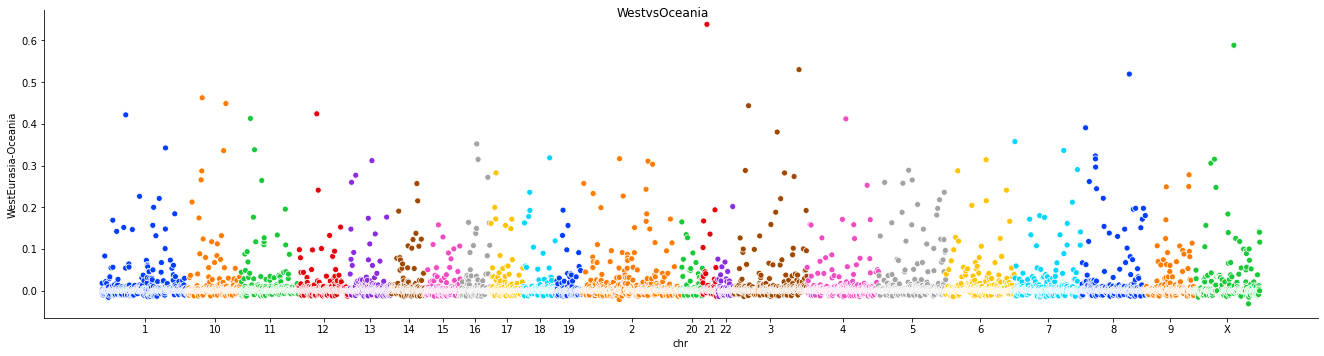

In [64]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import uniform, randint

# Simulate DataFrame
vst_dt['i']= vst_dt.index
#vst_dt['log_West_Oceania'] = np.log2(vst_dt['WestEurasia-Oceania'])

# Generate Manhattan plot: (#optional tweaks for relplot: linewidth=0, s=9)
plot = sns.relplot(data=vst_dt, x='i', y='WestEurasia-Oceania', aspect=3.7, 
                  hue='chr', palette = 'bright', legend=None) 
chrom_df=vst_dt.groupby('chr')['i'].median()
plot.ax.set_xlabel('chr'); plot.ax.set_xticks(chrom_df);
plot.ax.set_xticklabels(chrom_df.index)
plot.fig.suptitle('WestvsOceania');

<h1>  Sudmant data 

In [65]:
header= ['Sample', 'Region', 'Country', 'Sample_ID', 'Sex']
studmant_anotation = pd.read_csv('/branchinecta/jbazanwilliamson/Studmant_anotation.csv', names=header, index_col=0)#Studmant data

studmant_data = pd.read_csv('/branchinecta/jbazanwilliamson/Studmant_cnvs.csv')
#studmant_data

In [36]:


#studmant_data.loc[studmant_data['contig'] == 'chr16'].head(400)

In [37]:
coordinates = studmant_data.iloc[:,0:2]
cnvs = studmant_data.iloc[:,6:284]
cnvs = cnvs.T
cnvs = cnvs.fillna(2)
statistics.variance(cnvs[1])
#cnvs[1].var()

4.8401233911286035

In [38]:
features = studmant_anotation.loc[:,["Region","Country", "Sex",]]
dt = features.merge(cnvs, left_index=True, right_index=True)
features = dt.loc[:,['Region', 'Country', 'Sex']]
dt = dt[dt['Region'].notna()]

In [39]:
dt = dt.groupby('Region')
dt

In [40]:
####### Groupby regions #######

dt_groupped = []
regions = features['Region'].unique()
for i in regions:
    dt_groupped.append(dt.get_group(str(i)))
    
######## V = within-population variance ######

v = []
for i in dt_groupped:
    v.append((i.var()))#You can add log2 transformation here as np.log2(i.var())


########### N =  numbers of individuals sampled from population each cnv ##############
n = dt.count()
n = n.drop(columns=['Sex', 'Country'])
n = n.reindex(regions)
n = np.array(n)
    

######## Vt = total variance across all individuals of the pair of populations ########
vt = []
combination_regions = list(combinations([0,1,2,3,4,5,6,7],2))
for i in combination_regions:
    pair_populations = pd.concat([dt_groupped[i[0]],dt_groupped[i[1]]])# dt_groupped[i[0]]+dt_groupped[i[1]]
    vt.append(pair_populations.var())

    
########## Vs ################## 
### Vs = (V1*n1+V2*n2)/(n1+n2) 
## where V1 is the within-population variance of population 1, 
## V2 is the within population variance of population 2, 
#n1 and n2 are the numbers of individuals sampled from population 1 and 2, respectively.

vs = []
for i in combination_regions:
    v1 = v[i[0]]*n[i[0]]
    v2 = v[i[1]]*n[i[1]]
    ns = n[i[0]]+n[i[1]]
    vs_formula = (v1+v2)/ ns
    vs.append(vs_formula)
    
    
    
########## Vst #################
#####(VT−VS)/VT
vst = []
for i in range(28):
    vst.append(((vt[i])-(vs[i]))/(vt[i]))
    

In [41]:
vst_dt = np.array(vst)
vst_dt = pd.DataFrame(vst_dt)


#### ADD pair-population names #####
combination_names = []
for i in list(combinations(regions,2)):
    combination_names.append(i[0]+str('-')+i[1])

In [42]:
vst_dt = vst_dt.set_axis(combination_names)
vst_dt = vst_dt.T
#vst_dt['chr'] = studmant_data['contig']
vst_dt.insert (0, 'chr', studmant_data['contig'])
vst_dt.insert (1, 'start', studmant_data['start'])
vst_dt.insert (2, 'end', studmant_data['end'])
vst_dt = vst_dt.round(5)

In [43]:
vst_dt.sort_values(by='OCN-WEA', ascending=False).head(50)

,chr,start,end,AFR-AMR,AFR-ARC,AFR-EA,AFR-OCN,AFR-SA,AFR-SIB,AFR-WEA,...,EA-OCN,EA-SA,EA-SIB,EA-WEA,OCN-SA,OCN-SIB,OCN-WEA,SA-SIB,SA-WEA,SIB-WEA
17,chr1,766955,768698,0.26963,0.00000,0.07971,0.69046,0.00571,0.03755,-0.01020,...,0.35102,0.02559,-0.00406,0.09159,0.57508,0.46850,0.71172,-0.01035,0.00450,0.03962
9125,chr22,39356259,39388778,0.26246,0.00000,0.27139,0.78901,0.10368,0.21407,0.04456,...,0.33044,0.05632,-0.00488,0.15811,0.56682,0.43248,0.66474,0.00692,0.00318,0.07067
13607,chr8,23007163,23022425,0.04687,0.21250,0.07031,0.30923,0.05444,0.04825,0.07846,...,0.61765,NaN,NaN,NaN,0.57273,0.55000,0.63538,NaN,NaN,NaN
5487,chr16,21596721,21601719,NaN,0.00000,NaN,0.60372,NaN,NaN,NaN,...,0.61078,NaN,NaN,NaN,0.56562,0.54282,0.62864,NaN,NaN,NaN
8594,chr21,23654416,23666937,0.06949,NaN,0.46630,0.78035,0.18397,0.64150,0.05379,...,0.05414,0.10047,-0.01337,0.36594,0.31161,0.07975,0.61288,0.12088,0.06536,0.42547
13164,chr8,276526,281894,0.03479,-0.00000,0.00186,0.28441,-0.00577,-0.00974,0.00387,...,0.18572,0.02877,0.01235,0.06593,0.51233,0.44959,0.60017,-0.01035,0.01163,0.03975
13604,chr8,22996194,23001045,0.03684,0.25000,0.02604,0.25290,0.04286,0.03793,0.06211,...,0.44643,0.00000,-0.00000,0.00000,0.46286,0.44000,0.52836,NaN,NaN,NaN
1726,chr10,27638079,27642286,-0.01114,0.00857,0.07188,0.35685,-0.01435,0.05171,0.00913,...,0.12218,0.07348,-0.01522,0.17423,0.38303,0.14242,0.50672,0.06294,-0.00081,0.14968
1083,chr1,101231073,101232525,NaN,NaN,NaN,0.47430,0.00000,NaN,NaN,...,0.48168,0.00000,NaN,NaN,0.39176,0.41285,0.50063,0.00000,0.00000,NaN
9824,chr3,177002636,177011374,NaN,0.00000,NaN,0.47363,NaN,NaN,NaN,...,0.48100,NaN,NaN,NaN,0.43472,0.41219,0.49995,NaN,NaN,NaN


In [44]:
vst_dt.iloc[5487]

chr           chr16
start      21596721
end        21601719
AFR-AMR         NaN
AFR-ARC           0
AFR-EA          NaN
AFR-OCN     0.60372
AFR-SA          NaN
AFR-SIB         NaN
AFR-WEA         NaN
AMR-ARC           0
AMR-EA          NaN
AMR-OCN     0.53725
AMR-SA          NaN
AMR-SIB         NaN
AMR-WEA         NaN
ARC-EA            0
ARC-OCN     0.03825
ARC-SA            0
ARC-SIB          -0
ARC-WEA           0
EA-OCN      0.61078
EA-SA           NaN
EA-SIB          NaN
EA-WEA          NaN
OCN-SA      0.56562
OCN-SIB     0.54282
OCN-WEA     0.62864
SA-SIB          NaN
SA-WEA          NaN
SIB-WEA         NaN
Name: 5487, dtype: object

In [ ]:
n